# Drawing Call Graphs

The "call graph" is a graph that encodes how bloqs "call" other bloqs as part of their decomposition. We can visualize the call graph of a bloq using the convenience method `qualtran.drawing.show_call_graph`.

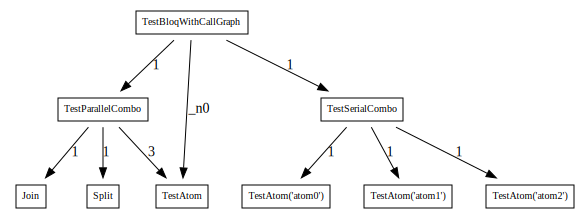

In [1]:
from qualtran.bloqs.for_testing.with_call_graph import TestBloqWithCallGraph
from qualtran.drawing import show_call_graph

bloq = TestBloqWithCallGraph()
call_graph, _ = bloq.call_graph()
show_call_graph(call_graph)

## `GraphvizCallGraph`

Under the hood, the above function uses the `GraphvizCallGraph` class, which describes how to format the display of each bloq and interfaces with Graphviz through `pydot`. 

In [2]:
from qualtran.drawing import GraphvizCallGraph

drawer = GraphvizCallGraph(call_graph)

# Additional methods are provided like `get_svg_bytes` which can
# be written to a file to save the diagram.
print(drawer.get_svg_bytes()[:400], '...')

b'<?xml version="1.0" encoding="UTF-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<!-- Generated by graphviz version 2.43.0 (0)\n -->\n<!-- Title: counts Pages: 1 -->\n<svg width="586pt" height="218pt"\n viewBox="0.00 0.00 586.00 218.00" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">\n<g id="graph0"' ...


For example, you can annotate each bloq with its t complexity

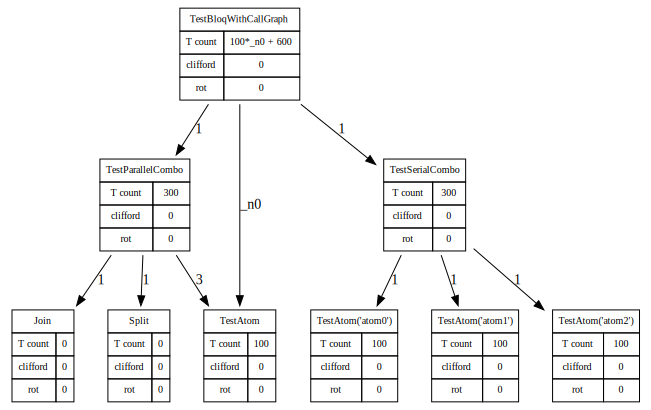

In [3]:
# Collect T-Complexity data
bloq_data = {}
for bloq in call_graph.nodes:
    tcomp = bloq.t_complexity()
    record = {
        'T count': tcomp.t,
        'clifford': tcomp.clifford,
        'rot': tcomp.rotations,
    }
    bloq_data[bloq] = record

# Draw the call graph with the additional data
GraphvizCallGraph(call_graph, bloq_data=bloq_data).get_svg()

The abstract base class `_CallGraphDrawerBase` is provided with overridable methods if you need additional customization of how bloqs are displayed in the call graph.